
# Project: Investigate a Dataset - [TMDb movie data]

# Introduction:

description of the dataset:

This dataset contains two tables the first one is credits that contains the following coloumns:
- movie_id
- title
- cast
- crew

the other table is movies and contains the following columns:
- budget
- genres
- homepage
- id
- keywords
- original_language
- original_title
- overview
- popularity
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline
- title
- vote_average
- vote_count

these columns can show detailed information about the movie and how it is success through for example its revenue. As appears in the credits table it contains the id of the movie, title (that is shared between the 2 tables), the cast whic contains multiple values and the crew. So the movie_id connect the cast and the crew with the movie deatailes.


# Questions:
Q1: what is the relationship between popularity and release_year?

Q2: what is the relationship between vote_count with popularity and revenue?

Q3: which director of a movie with highest revenue of the movie?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

<a id='wrangling'></a>
## Data Wrangling

### Loading the dataset 

In [2]:
df= pd.read_csv('tmdb-movies.csv')
#size of the dataframe
df.shape

(10866, 21)

### inspecting the dataset, its columns' datatype,check for missing data and duplicates

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

from the above we can see that there are some missing values in some features like:imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. all these features are of the type object. 

also we can note that we have some features of the type object(string), float and int.
imdb_id is of type object maybe it must be of the type int. 

the release_date is of the type object, we can change it to datetime

In [4]:
#how much duplicates in the dataset
sum(df.duplicated())

1

from the cell above we can see that we have one duplicate

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


from the above we can see that for the revenue the min , 25% and 50% is 0.

in the following cells i am going to solve the issues we found in the dataset.

In [6]:
#dropping the duplicate
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

 in some features we have large number of nulls like in the homepage, production_companies, tagline, and keywords. production_companies is an importent feature to answer the second question, so to solve the null isse we can imputing the nulls, however the homepage, tagline have a large number of missing values and they are not importent to answer the questions we asked so we can deop these features.


In [7]:
#now we will try to solve the null problem:
#dropping the homepage and the tagline:
df.drop(['homepage','tagline'], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [8]:
#imputing the production_companies and the keywords
#we can't impute the production_companies with the mode since it has multiple features separated by |, so i will impute it
#with the word 'unknown'. the keywords as well.
df['production_companies'].fillna('unknown', inplace=True)
df['keywords'].fillna('No Keywords', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   director              10821 non-null  object 
 8   keywords              10865 non-null  object 
 9   overview              10861 non-null  object 
 10  runtime               10865 non-null  int64  
 11  genres                10842 non-null  object 
 12  production_companies  10865 non-null  object 
 13  release_date          10865 non-null  object 
 14  vote_count            10865 non-null  int64  
 15  vote_average       

from the above we can see that we solve the missing values issue for some features, however there are some features with missing values.

In [9]:
#complete imputing the other missing values in the other features
df['overview'].fillna('no overview', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['director'].fillna('unknown', inplace=True)
df['genres'].fillna('unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   director              10865 non-null  object 
 8   keywords              10865 non-null  object 
 9   overview              10865 non-null  object 
 10  runtime               10865 non-null  int64  
 11  genres                10865 non-null  object 
 12  production_companies  10865 non-null  object 
 13  release_date          10865 non-null  object 
 14  vote_count            10865 non-null  int64  
 15  vote_average       

In [10]:
#we can convert the release_date to datetime
#note: i think we can avoid this step since the release date will not help in answering the questions we asked at the beginning
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

## Exploratory Data Analysis:

some analysis in order to answer the first question:

In [11]:
df.groupby(['popularity','release_year']).mean(numeric_only=True)

,,id,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,release_year,,,,,,,,
0.000065,1985,18729.0,0.0,0.000000e+00,561.0,17.0,6.0,0.000000e+00,0.000000e+00
0.000188,1971,32082.0,0.0,0.000000e+00,103.0,10.0,6.4,0.000000e+00,0.000000e+00
0.000620,2013,174323.0,0.0,0.000000e+00,92.0,82.0,6.1,0.000000e+00,0.000000e+00
0.000973,2005,31329.0,0.0,0.000000e+00,105.0,13.0,5.7,0.000000e+00,0.000000e+00
0.001115,2006,15412.0,0.0,0.000000e+00,135.0,10.0,6.8,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
13.112507,2015,262500.0,110000000.0,2.952382e+08,119.0,2480.0,6.3,1.012000e+08,2.716190e+08
14.311205,2014,118340.0,170000000.0,7.733124e+08,121.0,5612.0,7.9,1.565855e+08,7.122911e+08
24.949134,2014,157336.0,165000000.0,6.217525e+08,169.0,6498.0,8.0,1.519800e+08,5.726906e+08


from the above we can see that the popularity for old movies (1985-2006) is very small, however it seems that is is increase over time.

now let us see the relationship between the vote_count with popularity:

In [12]:
df.groupby(['popularity','vote_count','revenue']).mean(numeric_only=True)

,,,id,budget,runtime,vote_average,release_year,budget_adj,revenue_adj
popularity,vote_count,revenue,,,,,,,
0.000065,17,0,18729.0,0.0,561.0,6.0,1985.0,0.000000e+00,0.000000e+00
0.000188,10,0,32082.0,0.0,103.0,6.4,1971.0,0.000000e+00,0.000000e+00
0.000620,82,0,174323.0,0.0,92.0,6.1,2013.0,0.000000e+00,0.000000e+00
0.000973,13,0,31329.0,0.0,105.0,5.7,2005.0,0.000000e+00,0.000000e+00
0.001115,10,0,15412.0,0.0,135.0,6.8,2006.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
13.112507,2480,295238201,262500.0,110000000.0,119.0,6.3,2015.0,1.012000e+08,2.716190e+08
14.311205,5612,773312399,118340.0,170000000.0,121.0,7.9,2014.0,1.565855e+08,7.122911e+08
24.949134,6498,621752480,157336.0,165000000.0,169.0,8.0,2014.0,1.519800e+08,5.726906e+08


we can see that at the beginnings there is no cleare relationship between vote_count with popularity and revenue, we can see that the popularity increase although the vote_count deacrease. the revenue at the beginnings is 0 and this is not normal. but then we can say that while the vote_count increase the popularity increase except the last row the vot_count decrease, however the popularity increase.

we can notice that the budget for some movies=0 and this does not make sense.

In [13]:
#check how much rows with revenue=0
df[df["revenue"] == 0].shape

(6016, 19)

In [14]:
#check how much coloumns with budget=0
df[df["budget"] == 0].shape

(5696, 19)

In [15]:
#check for the number of rows with budget=0 and revenue=0
df[(df["revenue"] == 0) & (df["budget"] == 0)].shape

(4701, 19)

In [16]:
df.groupby('director')['revenue'].sum(numeric_only=True).sort_values(ascending=False)

director
Steven Spielberg                9018563772
Peter Jackson                   6523244659
James Cameron                   5841894863
Michael Bay                     4917208171
Christopher Nolan               4167548502
                                   ...    
Kyung Ho Lee                             0
Kyungmin Woo                             0
L. Gustavo Cooper                        0
L.Q. Jones                               0
Michael Henger|Kari Juusonen             0
Name: revenue, Length: 5068, dtype: int64

we can see that Steven Spielberg is the director with the highest movie revenue.

###  Communicate the results and visualize it :

the following is a plots for the releationship between the popularity and the release_year:

<AxesSubplot: title={'center': 'popularity over years'}, xlabel='release_year', ylabel='popularity'>

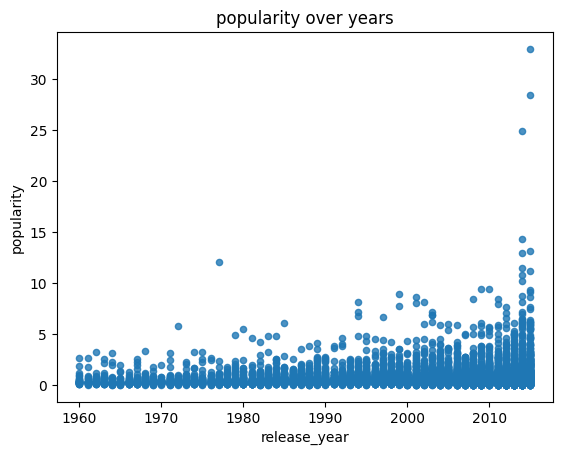

In [17]:
df.plot(x='release_year',y='popularity',kind='scatter',title='popularity over years',alpha=0.8)

from the scatter plot above we can see the distribution of the popularity over time. and we can say that there is an overall increase over time. A noticeable increase from nearly 2000

<AxesSubplot: title={'center': 'average popularity/year'}, xlabel='release_year'>

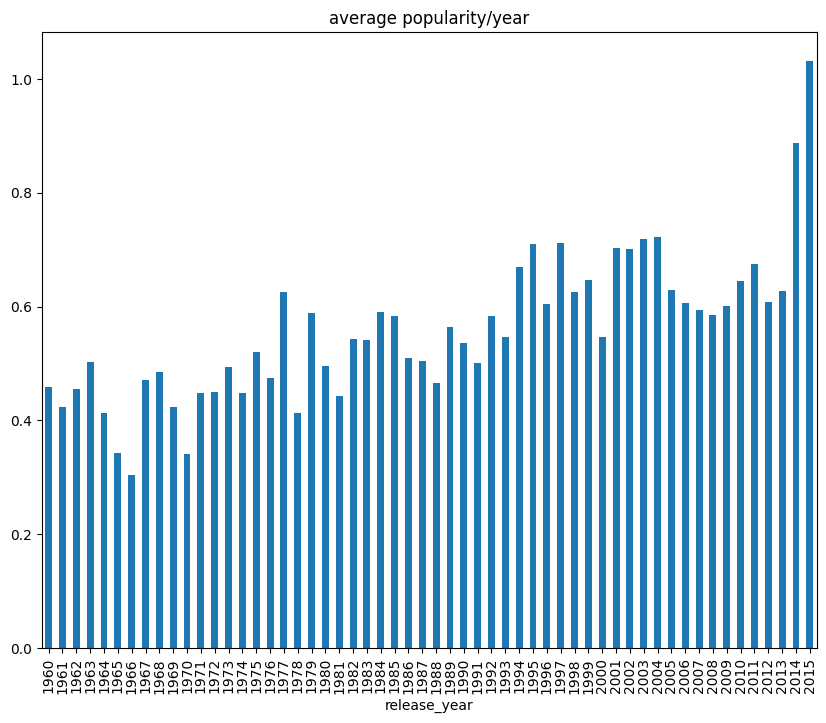

In [18]:
df.groupby('release_year')['popularity'].mean().plot(kind='bar', title='average popularity/year',figsize=(10, 8))


so from the above we can see the average popularity per year and we can say that 2015 has the highest mean of popularity. we can notice that some years have average popularity more than others (for example between 2005 and 2014 there is an increase than 2001-2004).

now we move to the second question:

<AxesSubplot: title={'center': 'popularity with vote_count'}, xlabel='vote_count', ylabel='popularity'>

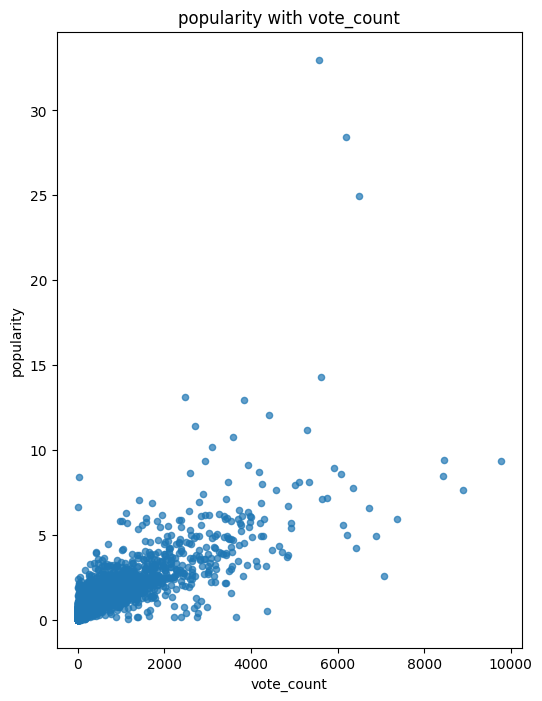

In [19]:
df.plot(x='vote_count',y='popularity',kind='scatter',title='popularity with vote_count', alpha=0.7,figsize=(6,8))

from the plot above we can say that there is a positive correlation between them, however it is not strong. Most of the movies are with vote count below 2000.

<AxesSubplot: title={'center': 'revenue with vote_count'}, xlabel='vote_count', ylabel='revenue'>

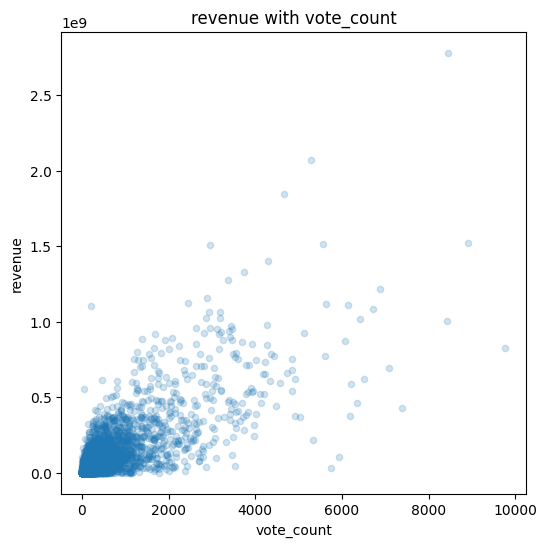

In [20]:
df.plot(x='vote_count',y='revenue',kind='scatter',title='revenue with vote_count', alpha=0.2,figsize=(6,6))

A number of movies have revenue of zero, which is unusual and most likely the result of incorrect . Also, most of movies form a cluster in the lower left (vote count < 2000, revenue < 0.5) with low revenue and a vote count below 2000. This means that movies with fewer votes often bring in less revenue.

now stepping to the last question:

<AxesSubplot: title={'center': 'Top 10 Directors by Revenue'}, xlabel='director'>

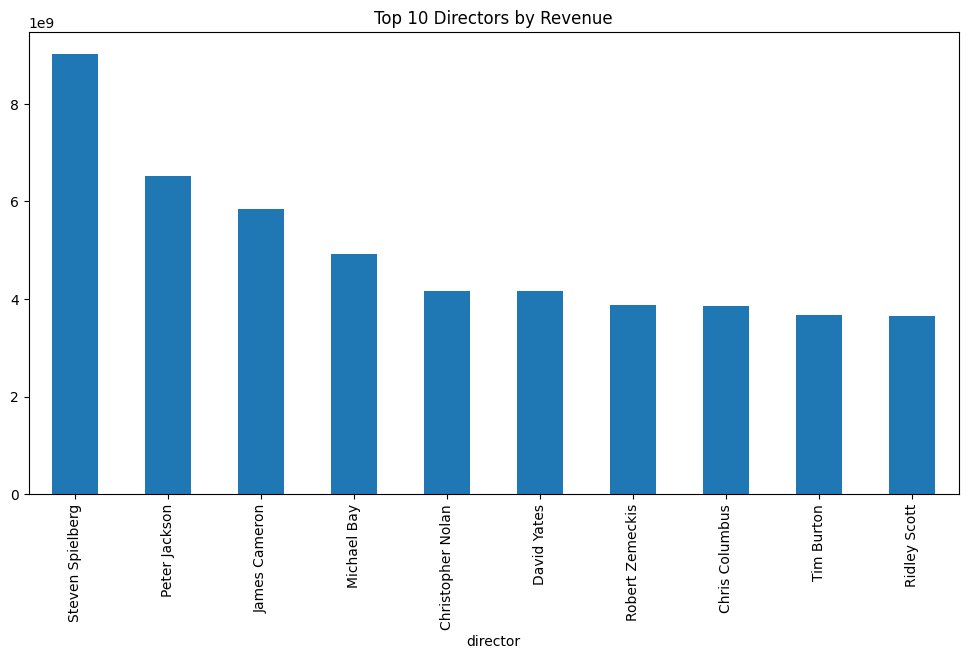

In [21]:
director_revenue = df.groupby('director')['revenue'].sum(numeric_only=True).sort_values(ascending=False)
director_revenue.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Directors by Revenue')


from the above bar plot that displays the top 10 director VS the revenue , we can see that some directors have revenue more than the other and the top one is Steven Spielberg.
let us try see it with popularity

<AxesSubplot: title={'center': 'Top 10 Directors by popularity'}, xlabel='director'>

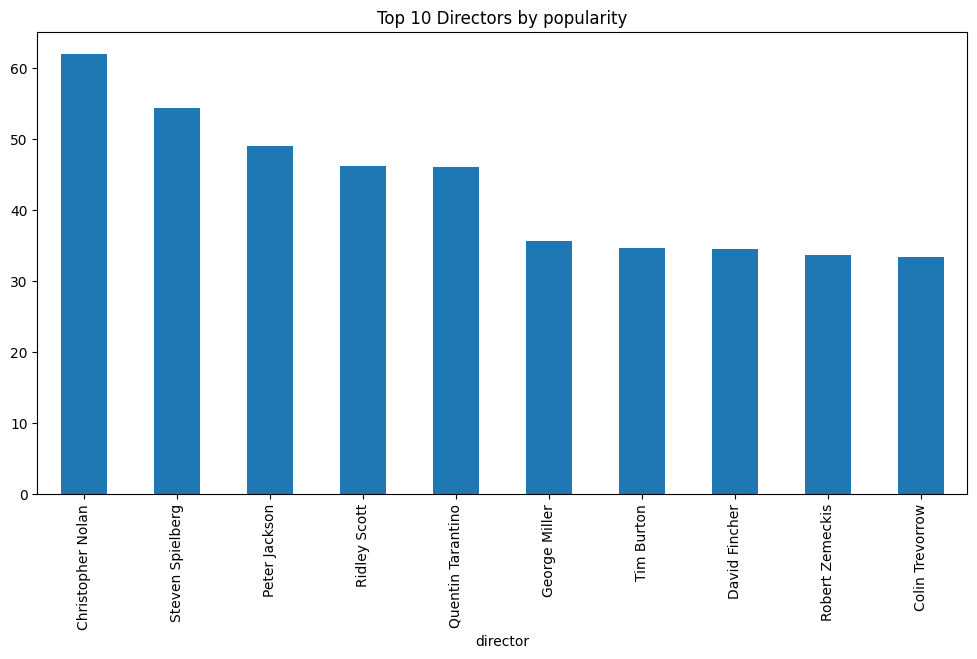

In [22]:
director_pop = df.groupby('director')['popularity'].sum(numeric_only=True).sort_values(ascending=False)
director_pop.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Directors by popularity')


we can notice that here Christopher Nolan is the top one and Steven Spielberg becomes the second one.

<a id='conclusions'></a>
## Conclusions
After analyzing the dataset to answer the initial questions, several key insights are found:

Although some movies have lower popularity scores than previous ones, there is an overall increase over time. Additionally, 2015 had the highest average popularity.
Initially, there was no clear relationship between vote_count and popularity, but over time, a pattern emerged, showing a positive correlation. We also observed that a large number of movies have fewer than 2000 votes. A similar trend was found between revenue and vote_count.
When analyzing directors with the highest popularity, we found that Steven Spielberg ranked the highest. However, when considering revenue, Christopher Nolan surpassed him as the top one.

## Limitations

Despite our findings, there are some important limitations in the dataset:

Missing or Incorrect Revenue Data:
A significant portion of movies (about 55%) have revenue = 0, which is unusual and suggests missing or incorrect data.
Missing or Incorrect Budget Data:
Similarly, about 52% of movies have budget = 0, which is also unlikely to be accurate.
Overlapping Issues:
Approximately 43% of the dataset consists of movies where both revenue = 0 and budget = 0, making it difficult to extract meaningful financial insights.
Since budget and revenue are crucial for financial analysis, data cleaning is necessary before drawing further conclusions.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb